<a href="https://colab.research.google.com/github/cromi0256/Study01/blob/main/13%EC%9E%A5_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#13장 회귀분석

#13-1 선형 회귀
#예측과 타깃 사이의 평균제곱오차(MSE)를 최소화하는 회귀계수 w(가중치)와 b(절편)를 찾음

#선형회귀의 가정
#정규성:잔차는 정규분포의 형태
#등분산성:잔차의 분산이 일정하다
#선형성:종속변수는 예측변수와 선형결합이다
#독립성:잔차는 서로 독립이다

In [2]:
#13-1-1 단순 선형 회귀
#y=xw+b

#statsmodel 방법
from sklearn.datasets import load_diabetes
import pandas as pd
import statsmodels.api as sm

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [3]:
X=df['bmi']
Y=df['target']
Xc=sm.add_constant(X) #절편추가

model = sm.OLS(Y,Xc)  #모델생성
result = model.fit()
resid=result.resid  #잔차 추출
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           3.47e-42
Time:                        12:59:03   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

In [4]:
#sklearn 방법
from sklearn.linear_model import LinearRegression
X=df[['bmi']] #2차원 형태로 추출

LR=LinearRegression()
LR.fit(X,Y)
pred=LR.predict(X)

print("회귀계수:",LR.coef_)
print("절편:",LR.intercept_)
print("R2:",LR.score(X,Y))

회귀계수: [949.43526038]
절편: 152.13348416289617
R2: 0.3439237602253802


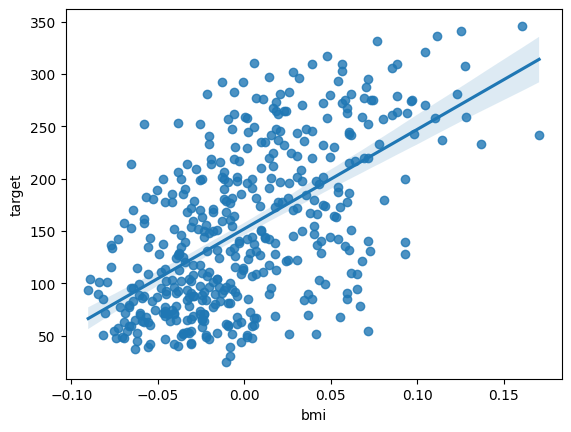

In [5]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='bmi',y='target',data=df)
plt.show()

In [6]:
#다중 선형 회귀
#입력된 특성이 둘 이상

X=df[['bmi','age','sex','bp']]
y=df['target']

#함수정의
def multiR_reg(X,y):
  X_=sm.add_constant(X)
  model=sm.OLS(y,X_)
  result=model.fit()
  return result, result.summary()

fit, summary = multiR_reg(X,y)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           2.70e-47
Time:                        12:59:07   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.853     53.329      0.0

In [7]:
#영향치 판단
influ=fit.get_influence().summary_table()
#print(influ)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           2.70e-47
Time:                        12:59:08   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.853     53.329      0.0

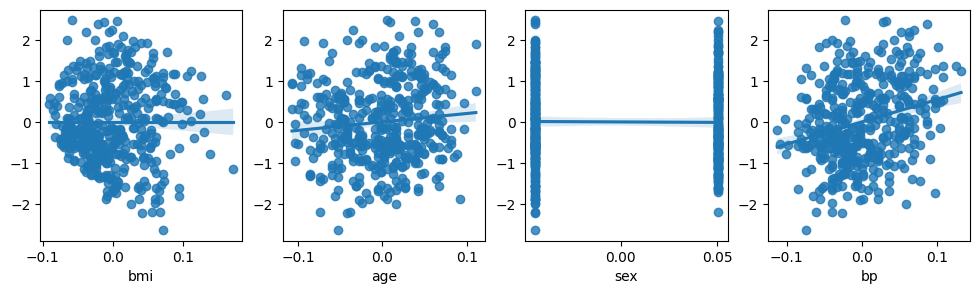

In [8]:
#잔차 분석
fit,summary=multiR_reg(X,Y)
print(summary)
#1 정규성 검정: Prob(Omnibus)<0.05, Prob(JB) < 0.05로 정규분포와 차이가 있다
#+정규분포는 왜도0 첨도3을 갖는다(skew:0.146, kurt:2.485)
#2 등분산성 검정: 모든 잔차의 분산이 일정하다
from scipy.stats import zscore
sresid=zscore(resid)
fig,ax=plt.subplots(1,4,figsize=(12,3))
for feature,ax in zip(X.columns,ax.ravel()):
  sns.regplot(x=X[feature],y=sresid,ax=ax)
plt.show()
#3 독립성 검정: Durbin-Watson이 2와 가까우므로 잔차 간 독립이다

In [9]:
#13-1-3 규제선형회귀
#릿지회귀: 회귀계수에 L2규제를 주어 절댓값을 0과 가깝게 함
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)
ridge1=Ridge(alpha=1).fit(X_train,y_train)
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
train1=ridge1.score(X_train,y_train)
test1=ridge1.score(X_test,y_test)
train01=ridge01.score(X_train,y_train)
test01=ridge01.score(X_test,y_test)
print("alpha=1")
for i,coef in enumerate(ridge1.coef_):
  print(f'회귀계수{i}:{coef:.3f}')
print(f'절편:{ridge1.intercept_:.3f}')
print("train score:",train1)
print("test score:",test1,'\n')

print("alpha=0.1")
for i,coef in enumerate(ridge01.coef_):
  print(f'회귀계수{i}:{coef:.3f}')
print(f'절편:{ridge01.intercept_:.3f}')
print("train score:",train01)
print("test score:",test01)

alpha=1
회귀계수0:349.429
회귀계수1:93.919
회귀계수2:-6.767
회귀계수3:229.413
절편:153.056
train score: 0.29317703788988503
test score: 0.30146842194357937 

alpha=0.1
회귀계수0:695.318
회귀계수1:87.721
회귀계수2:-70.513
회귀계수3:382.188
절편:153.147
train score: 0.38993995500474177
test score: 0.40901980653596315


In [10]:
#라쏘 회귀: 회귀계수에 L1규제를 주어 어떤 특성의 가중치가 0이 될 수 있음(특성 제거)
from sklearn.linear_model import Lasso

Lasso1=Lasso(alpha=1).fit(X_train,y_train)
Lasso01=Lasso(alpha=0.1).fit(X_train,y_train)
train1l=Lasso1.score(X_train,y_train)
test1l=Lasso1.score(X_test,y_test)
train01l=Lasso01.score(X_train,y_train)
test01l=Lasso01.score(X_test,y_test)
print("alpha=1")
for i,coef in enumerate(Lasso1.coef_):
  print(f'회귀계수{i}:{coef:.3f}')
print(f'절편:{ridge1.intercept_:.3f}')
print("train score:",train1l)
print("test score:",test1l,'\n')

print("alpha=0.1")
for i,coef in enumerate(Lasso01.coef_):
  print(f'회귀계수{i}:{coef:.3f}')
print(f'절편:{ridge01.intercept_:.3f}')
print("train score:",train01l)
print("test score:",test01l)

alpha=1
회귀계수0:448.177
회귀계수1:0.000
회귀계수2:0.000
회귀계수3:90.851
절편:153.056
train score: 0.2738815808263181
test score: 0.3032718205969156 

alpha=0.1
회귀계수0:755.661
회귀계수1:35.950
회귀계수2:-29.222
회귀계수3:378.948
절편:153.147
train score: 0.39105101207122606
test score: 0.41326464486797176


In [11]:
#엘라스틱 넷:L1과 L2규제를 결합
from sklearn.linear_model import ElasticNet

a=0.2
ela_l1_1=ElasticNet(alpha=1,l1_ratio=1-a).fit(X_train,y_train)
ela_l1_01=ElasticNet(alpha=0.1,l1_ratio=1-a).fit(X_train,y_train)

ela_l2_1=ElasticNet(alpha=1,l1_ratio=a).fit(X_train,y_train)
ela_l2_01=ElasticNet(alpha=0.1,l1_ratio=a).fit(X_train,y_train)

print(f'alpha=1,l1_ratio={1-a}')
print('train score',ela_l1_1.score(X_train,y_train))
print('test score:',ela_l1_1.score(X_test,y_test))
print(f'alpha=1,l1_ratio={a}')
print('train score',ela_l2_1.score(X_train,y_train))
print('test score:',ela_l2_1.score(X_test,y_test))
print(f'alpha=0.1,l1_ratio={1-a}')
print('train score',ela_l1_01.score(X_train,y_train))
print('test score:',ela_l1_01.score(X_test,y_test))
print(f'alpha=0.1,l1_ratio={a}')
print('train score',ela_l2_01.score(X_train,y_train))
print('test score:',ela_l2_01.score(X_test,y_test))
#

alpha=1,l1_ratio=0.8
train score 0.006327849620627379
test score: 0.0045835894169320435
alpha=1,l1_ratio=0.2
train score 0.0027502908298798756
test score: 0.000450660476580933
alpha=0.1,l1_ratio=0.8
train score 0.09544961786520323
test score: 0.09490631683043027
alpha=0.1,l1_ratio=0.2
train score 0.029349424027374504
test score: 0.02721403172800052


In [16]:
#13-1-4 일반화 선형 회귀
#로지스틱 회귀, 포아송 회귀 등 정규분포를 따르지 않는 종속변수의 예측

#로지스틱 회귀:이진 분류 모델(다항 분류는 소프트맥스 사용)
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X=cancer.data[:,:4] #4개의 특성 사용
y=cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=10)

LR1=LogisticRegression(C=1).fit(X_train,y_train)
LR01=LogisticRegression(C=0.1).fit(X_train,y_train)

In [19]:
print('C=1')
for i,coef in enumerate(LR1.coef_[0]):
  print(f'회귀계수{i}:{coef:.3f}')
print(f'절편:{LR1.intercept_[0]:.3f}')
print('train score:',LR1.score(X_train,y_train))
print('test score:',LR1.score(X_test,y_test),'\n')
print('C=0.1')
for i,coef in enumerate(LR01.coef_[0]):
  print(f'회귀계수{i}:{coef:.3f}')
print(f'절편:{LR01.intercept_[0]:.3f}')
print('train score:',LR01.score(X_train,y_train))
print('test score:',LR01.score(X_test,y_test))

C=1
회귀계수0:2.975
회귀계수1:-0.235
회귀계수2:-0.773
회귀계수3:0.012
절편:26.690
train score: 0.9248826291079812
test score: 0.8951048951048951 

C=0.1
회귀계수0:0.412
회귀계수1:-0.228
회귀계수2:-0.507
회귀계수3:0.020
절편:33.040
train score: 0.9178403755868545
test score: 0.8811188811188811


In [22]:
#statsmodel 방법1
import statsmodels.api as sm

X_train_s=sm.add_constant(X_train)
model=sm.Logit(y_train,X_train_s)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.157072
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  426
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Jan 2025   Pseudo R-squ.:                  0.7622
Time:                        13:31:30   Log-Likelihood:                -66.913
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 1.464e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6040      7.974     -0.828      0.408     -22.232       9.024
x1            13.6435      2

In [23]:
#statsmodel 방법2
import statsmodels.api as sm

model2=sm.GLM(y_train,X_train_s,family=sm.families.Binomial())
result2=model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  426
Model:                            GLM   Df Residuals:                      421
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.913
Date:                Wed, 22 Jan 2025   Deviance:                       133.83
Time:                        13:33:35   Pearson chi2:                     323.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6347
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6040      7.974     -0.828      0.4

   math  prog_2  prog_3
0    41       0       1
1    41       0       0
2    44       0       1
3    42       0       1
4    40       0       1


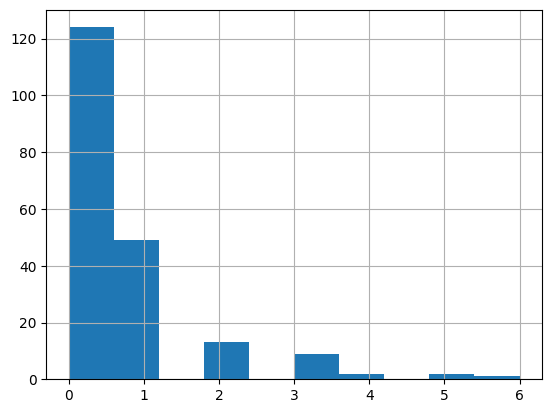

In [43]:
#포아송 회귀:종속변수(빈도 데이터)가 포아송 분포를 따를때

from sklearn.linear_model import PoissonRegressor
from matplotlib import pyplot as plt

awards=pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/8-1-4_awards.csv')
X=awards[['prog','math']]
X=pd.get_dummies(X,drop_first=True,columns=['prog']).astype(int)
y=awards['num_awards']
print(X.head())

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

y.hist()
plt.show()

In [44]:
PR=PoissonRegressor(alpha=0.1)
PR.fit(X_train,y_train)
print('train score:',PR.score(X_train,y_train))
print('test score:',PR.score(X_test,y_test))

train score: 0.3553211175733437
test score: 0.18646932288884754


In [45]:
#statsmodels
X_train_s=sm.add_constant(X_train)
modelp=sm.GLM(y_train,X_train_s,family=sm.families.Poisson())
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.157072
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  426
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Jan 2025   Pseudo R-squ.:                  0.7622
Time:                        13:51:48   Log-Likelihood:                -66.913
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 1.464e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6040      7.974     -0.828      0.408     -22.232       9.024
x1            13.6435      2

In [46]:
#13-1-5 이상치에 강한 선형회귀
#HuberRegressor,QuantileRegressor

In [53]:
#13-2 비선형 회귀

#다항회귀
import numpy as np
x=np.arange(-6.,6.,.1)
y=2*x**3+3*x**2+x+4
y_noise=25*np.random.normal(size=x.size)
y=y+y_noise

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pf=PolynomialFeatures(degree=3,include_bias=True)
pX=pf.fit_transform(x.reshape(-1,1))
LR=LinearRegression()
LR.fit(pX,y)
pred=LR.predict(pX)
print(LR.score(pX,y))

0.9819959959703135


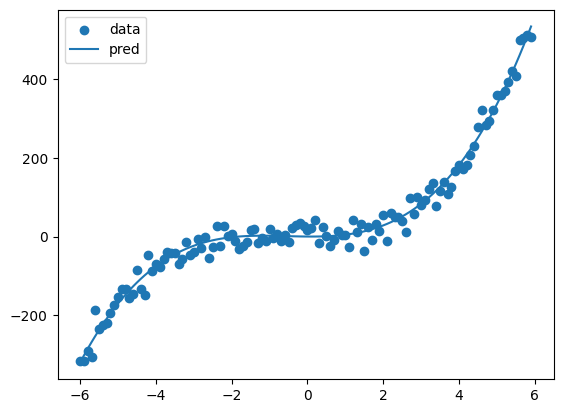

In [60]:
#시각화
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,label='data')
ax.plot(x,pred,label='pred')
ax.legend()
plt.show()

In [61]:
#statsmodels
model=sm.OLS(y,pX)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2109.
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          5.55e-101
Time:                        14:03:53   Log-Likelihood:                -545.07
No. Observations:                 120   AIC:                             1098.
Df Residuals:                     116   BIC:                             1109.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1855      3.165      0.059      0.9

In [71]:
#스플라인 회귀
from sklearn.preprocessing import SplineTransformer

x=np.arange(-6.,6.,.1)
y=2*x**3-3*x**2-18*x+4
y_noise=25*np.random.normal(size=x.size)
y=y+y_noise
spline=SplineTransformer(degree=3,n_knots=3)
sX=spline.fit_transform(x.reshape(-1,1))
LR=LinearRegression()
LR.fit(sX,y)
pred=LR.predict(sX)
print(LR.score(sX,y))

0.9637076088165784


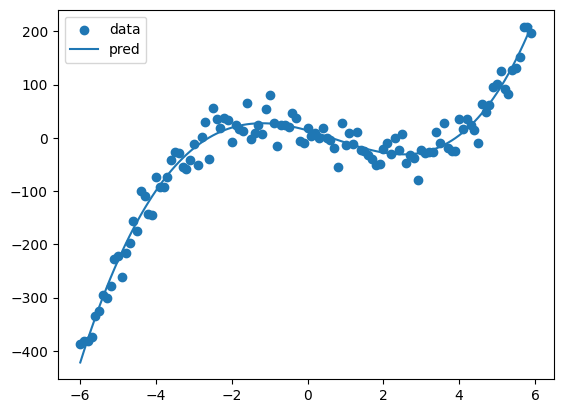

In [72]:
#시각화
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,label='data')
ax.plot(x,pred,label='pred')
ax.legend()
plt.show()